<a href="https://colab.research.google.com/github/bavendanom/Se-ales_y_sistemas_bavendanom/blob/se%C3%B1ales-y-sistemas/Parciales/Bonus_P01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PARCIAL 1: SEÑALES Y SISTEMAS 2023-1

- Desarrollo del bonus para el parcial.

Diseñe e implemente en simulación
sobre Python (cuaderno de Collaboratory), el proceso de digitalizacion de la señal: 
$$x(t)=7 sen (4t - Π/2)-2 cos (5t)+2cos(10t)$$
utilizando una tarjeta de adquisición de 3 bits con entrada análoga de 0 a 5 v.


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

Fs = 15 #Trecuencia de muestreo 
ti = 0 #Tiempo inicial 
tf = 4*np.pi #Tiempo final 
Ts = 1/Fs #Tiempo de muestreo
tn = np.arange(ti,tf,Ts) #Vector de datos en el tiempo 
x = 7*np.sin(4*tn-(np.pi/2))-2*np.cos(5*tn)+2*np.cos(10*tn) #Señal
x

array([-7.        , -7.07072189, -7.12911956, -6.78984525, -5.63044719,
       -3.41856393, -0.27059691,  3.33111089,  6.67559796,  9.06208158,
       10.04336939,  9.57420503,  8.0043506 ,  5.9212045 ,  3.90956588,
        2.33003792,  1.20814238,  0.27765733, -0.84512554, -2.43592757,
       -4.48731641, -6.66329122, -8.40660931, -9.15528153, -8.57661332,
       -6.71832918, -4.01059436, -1.11556526,  1.3143629 ,  2.86977238,
        3.51280742,  3.54960145,  3.46138062,  3.66887805,  4.33241012,
        5.27381841,  6.05346509,  6.16835847,  5.2850676 ,  3.40583488,
        0.89474743, -1.64921854, -3.61972022, -4.63523753, -4.67770549,
       -4.07909899, -3.36229501, -3.00470316, -3.22606228, -3.89135123,
       -4.57041228, -4.72874182, -3.96768683, -2.21104108,  0.2421607 ,
        2.82177378,  4.90380601,  6.04889693,  6.16134379,  5.50232044,
        4.55357612,  3.79199647,  3.47347296,  3.520238  ,  3.56101622,
        3.1072264 ,  1.78940199, -0.44866172, -3.28328062, -6.10

Tenemos una señal compuesta por tres ondas,
lo primero sera importar las librerias que se necesitaran en el desarrollo del codigo.

Se crea un vector de tiempo que contiene una secuencia de valores desde **ti** hasta **tf** con un incremento de **Ts**. Esta secuencia de tiempo se usa para crear la señal.

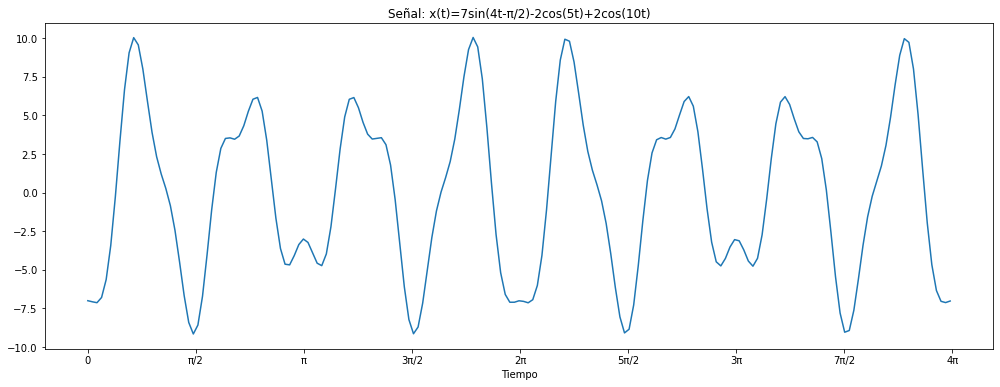

In [29]:
plt.figure(figsize=(17,6))
plt.plot(tn,x)
plt.title('Señal: x(t)=7sin(4t-π/2)-2cos(5t)+2cos(10t)')
plt.xlabel('Tiempo')
nuevas_unidades = ['0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2','4π']
nuevos_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi,5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi]
plt.xticks(nuevos_ticks, nuevas_unidades)
plt.show()

Se grafica la señal x en función del tiempo tn. Creada en el código anterior y personaliza el formato del gráfico, incluyendo la etiqueta del eje x y las marcas en unidades de radianes. Esto hace que la visualización de la señal sea más fácil de interpretar y analizar.

In [30]:
def my_ceropen(x,ymin = -5, ymax = 5): #En general se pueden definir valores por defecto 
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

Se define una función llamada my_ceropen que toma un argumento obligatorio y dos argumentos opcionales. La función toma una señal **x** y dos límites opcionales ymin y ymax que definen el rango vertical de la señal en donde se desea establecer.

Se encuentra el maximo y el minimo de **x**, se calcula la pendiente **m** con la formula que se indica.

Después, la función encuentra la intersección **c** de la línea con el eje y mediante la anterior fórmula. Con estos dos valores, la función calcula los valores de y correspondientes a cada valor de x.

Finalmente, la función devuelve un arreglo yv que contiene los valores de y correspondientes a cada valor de x.

In [31]:
y = my_ceropen(x,0,5)

Se llama a la función **my_ceropen** donde se ingresan 3 argumentos.El primer argumento x es una señal de entrada que se quiere escalar y centrar. El segundo argumento 0 es el valor mínimo, el tercer argumento 5 es el valor máximo. Es decir, el valor mínimo y maximo que se quiere que tenga la señal después de pasar por la funcion.

La función my_ceropen se encarga de tomar la señal de entrada x y escalarla y centrarla en el rango vertical definido por ymin y ymax. En este caso, ymin es 0 y ymax es 5, por lo que la función escalará y centrará la señal x de modo que su valor mínimo sea 0 y su valor máximo sea 5.

La función devuelve un arreglo yv que contiene los valores de **y** correspondientes a cada valor de **x** después de haber sido escalados y centrados. El resultado se guarda en la variable **y**, por lo que y contiene la señal escalada **y** centrada en el rango vertical de 0 a 5

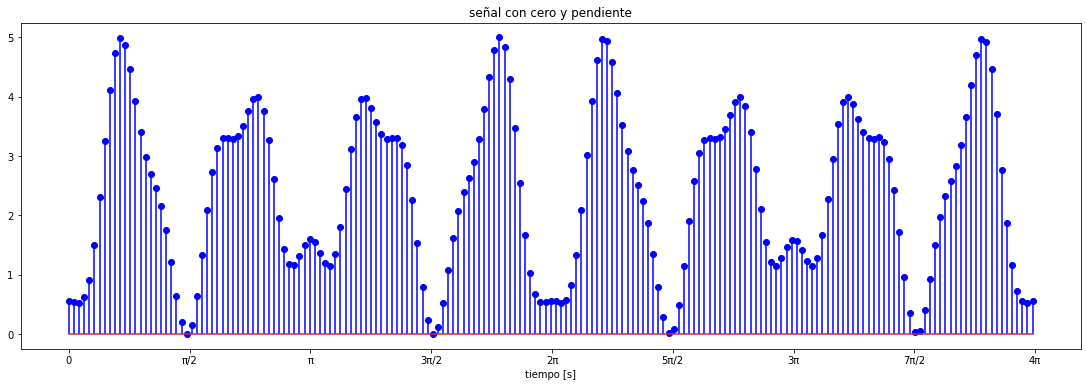

In [32]:
plt.figure(figsize=(19,6))
plt.stem(tn,y,'b-')
plt.xlabel('tiempo [s]')
plt.title('señal con cero y pendiente')
nuevas_unidades = ['0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2','4π']
nuevos_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi,5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi]
plt.xticks(nuevos_ticks, nuevas_unidades)
plt.show()

Se grafica la señal y en función del tiempo tn, creada en el código anterior.

Observando que la señal se encuentra escalada y centrada, ademas de eso ytilizamos la funcion stem la cual traza una gráfica de tallo y hojas para representar datos discretos en un eje de coordenadas. "Es útil para visualizar señales digitales y para resaltar los valores mínimos y máximos en una señal discreta. La función stem toma como argumentos los valores de los datos en el eje y y los valores correspondientes en el eje x." 

In [33]:
def anlog_digit(y,bits=3,rmin=0,rmax=5):
  nbits = bits
  ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax
  d = cdist(y.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
  d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve
  ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
  xx=ve[ind]
  return xx

Este código define una función llamada anlog_digit que toma como entrada un arreglo **y**, así como dos argumentos opcionales: bits que representa el número de bits que se usarán para cuantificar la señal, y rmin y rmax que representan los valores mínimo y máximo.

Dentro del proceso se define la variable nbits, que almacena un valor y se utiliza para calcular la cantidad de puntos de datos que se utilizarán al medir la señal. Esto se hace con la función np.linspace, que crea una matriz de valores iguales entre rmin y rmax de longitud 2^bits.

Luego, se usa la función cdist para calcular la distancia euclidiana entre cada valor en el símbolo y y cada uno de los puntos de referencia. Esto devuelve una matriz de valores (len(y), 2^bits) donde cada fila representa la distancia euclidiana entre el valor del símbolo y cada uno de los valores de referencia.

La función np.argmin se usa para encontrar el área del número más pequeño en cada fila del área de la matriz. Esto devuelve una indicación de longitud len(y), donde cada elemento es el punto de referencia más cercano al valor correspondiente en el símbolo.

In [34]:
ya=anlog_digit(y,3,0,5)

Este código llama a la función anlog_digit con tres argumentos: **y** que es un arreglo de valores, 3 que especifica el número de bits que se utilizarán para cuantificar la señal, y 0 y 5 que especifican los valores mínimo y máximo que puede tomar la señal.


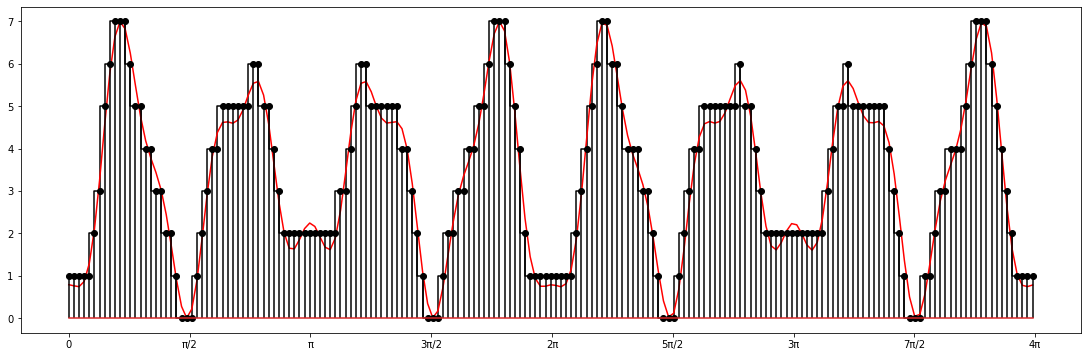

In [35]:
vez = np.linspace(0,5,8)
plt.figure(figsize=(19,6))
plt.plot(tn,ya,'k-', drawstyle='steps-pre')
plt.plot(tn,y,'r')
plt.stem(tn,ya,'k-')
nuevas_unidades = ['0', 'π/2', 'π', '3π/2', '2π','5π/2','3π','7π/2','4π']
nuevos_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi,5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi]
plt.xticks(nuevos_ticks, nuevas_unidades)
plt.yticks(vez, ['0', '1', '2', '3', '4','5','6','7'])
plt.show()